PYMC4 Version:4.0a2


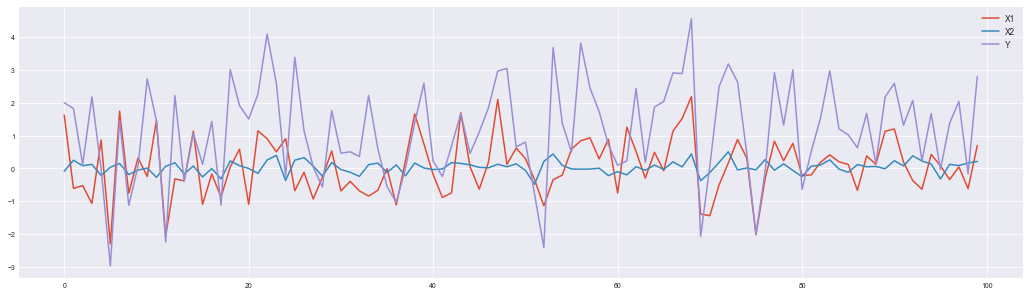

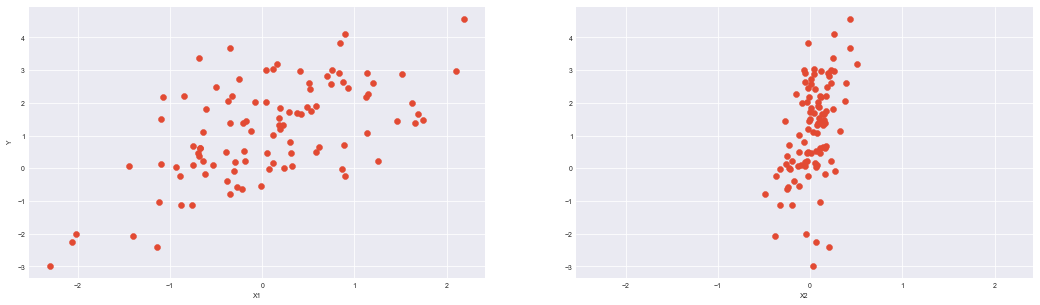

In [43]:
import os, sys, datetime, re, json
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from pylab import rcParams
import matplotlib
matplotlib.pyplot.rcParams.update(params)
%matplotlib inline
pd.set_option('display.max_colwidth', 1024)
matplotlib.rcParams['figure.figsize'] = (18, 5)
import pymc4 as pm
print(f'PYMC4 Version:{pm.__version__}')

np.random.seed(1)


# ~~~ Generate artificial data with some values
alpha, sigma = 1, 1
beta = [1, 2.5]

size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

plt.plot(X1, label = "X1")
plt.plot(X2, label = "X2")
plt.plot(Y, label = "Y")
plt.legend();
plt.show()

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');


In [ ]:
import pymc3 as pm
model = pm.Model()

with model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta  = pm.Normal('beta' , mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
    
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 4 chains, 0 divergences:  23%|██▎       | 5115/22000 [02:17<07:43, 36.39draws/s]

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.98,0.10,0.79,1.18,0.0,0.0,20815.0,20815.0,20817.0,13846.0,1.0
beta[0],0.94,0.11,0.72,1.15,0.0,0.0,23473.0,23473.0,23478.0,15060.0,1.0
beta[1],3.58,0.54,2.56,4.60,0.0,0.0,23572.0,23126.0,23752.0,15346.0,1.0
sigma,1.01,0.07,0.88,1.15,0.0,0.0,26004.0,25645.0,26187.0,15626.0,1.0


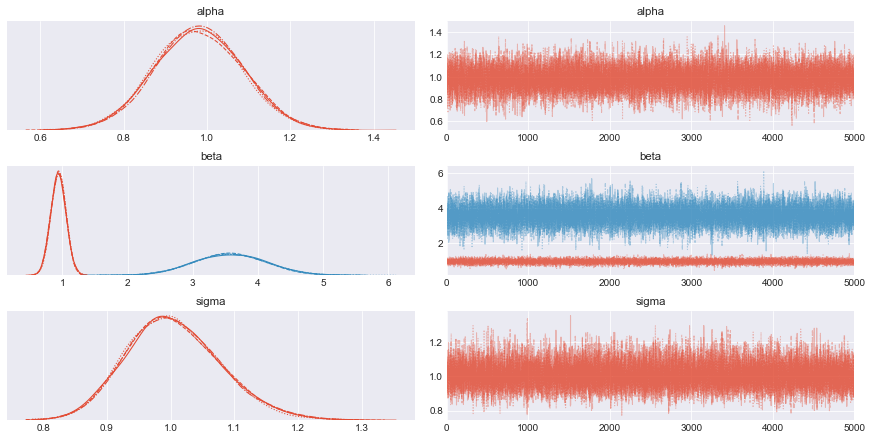

In [50]:
pm.traceplot(trace);
pm.summary(trace).round(2)
